In [35]:
import pcraster as pcr
from osgeo import gdal
import numpy as np
import pandas as pd
import rasterio
from rasterio.plot import show
from matplotlib import pyplot
import geopandas as gpd
import os


In [36]:
dem = (r"/home/erickcastro/shapes_modelacion_PV/demcutdef.tif")
demr = rasterio.open(dem)
dem = pcr.readmap("dem.map")

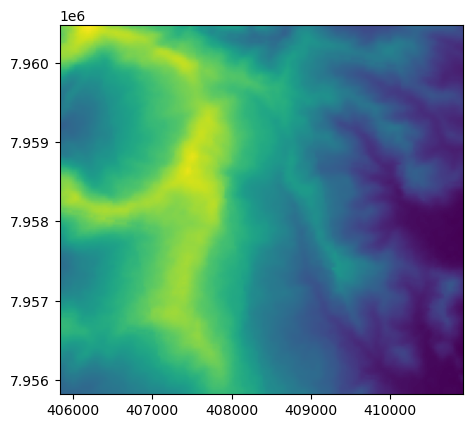

<Axes: >

In [37]:
show(demr)

In [38]:
### desde rasterior utilizamos la funciòn numpy para convertir de tif a PCR format o .map
dem = pcr.numpy2pcr(pcr.Scalar, demr.read(1), -999)
dem = pcr.report(dem, "dem.map")


In [30]:
##comenzamos a realizar y construir los inputs del model
##convertir a formato bool el dem
#demclone = pcr.setclone("dem.map")
#demclone = pcr.setclone("dem.map")
#demclone = pcr.report("demclone.map")

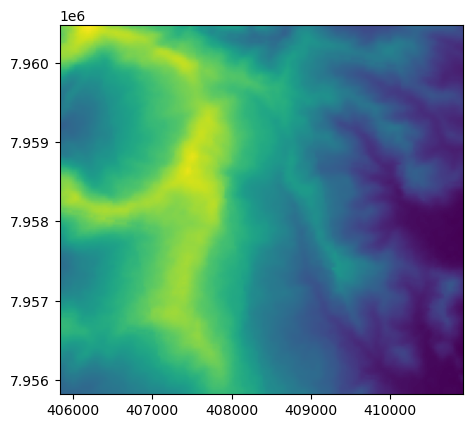

<Axes: >

In [39]:
dem3ras = rasterio.open("dem.map")
show(dem3ras)

In [67]:
demclone = pcr.setclone("dem.map")

In [69]:
clone = pcr.boolean(dem)
clone = pcr.report(clone, "clone.map")

In [56]:
## mapa de pendientes
dem = pcr.readmap("dem.map")
dem = pcr.scalar(dem)
slope = pcr.slope(dem)


In [33]:
slope = pcr.report(slope, "slope.map")

In [19]:
demclone = pcr.setclone("dem.map")
pcr.report("demclone.map")

In [34]:
## local drain direction
ldd= pcr.ldd("dem.map")
ldd = pcr.report(ldd, "ldd.map")

In [35]:
lddcreate = pcr.lddcreate(dem, 9999999,9999999, 9999999, 9999999)
pcr.report(lddcreate, "lddcreate.map")

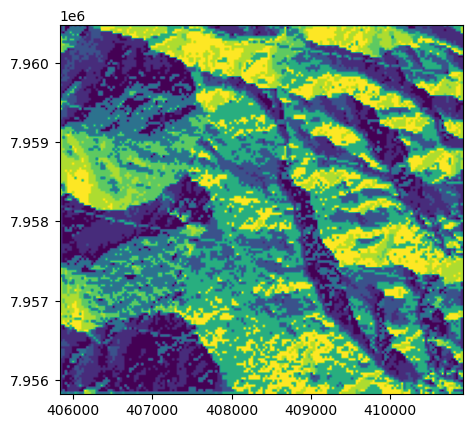

<Axes: >

In [36]:
lddcreate2 = rasterio.open("lddcreate.map")
show(lddcreate2)

In [37]:
lddsound = pcr.lddrepair("lddcreate.map")
lddsound = pcr.report(lddsound, "lddsound.map")

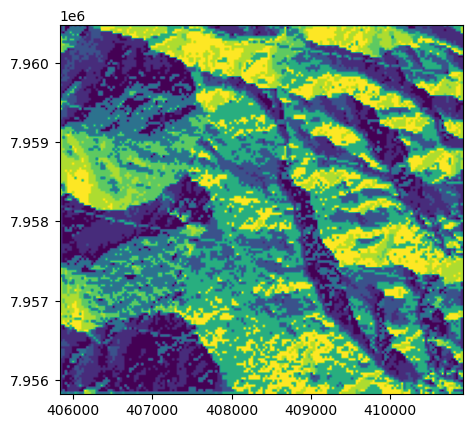

<Axes: >

In [38]:
lddcreate2 = rasterio.open("lddsound.map")
show(lddcreate2)


In [39]:
accuflux = pcr.accuflux(arg1="lddsound.map", arg2= 1)
accuflux = pcr.report(accuflux, "accuflux.map")

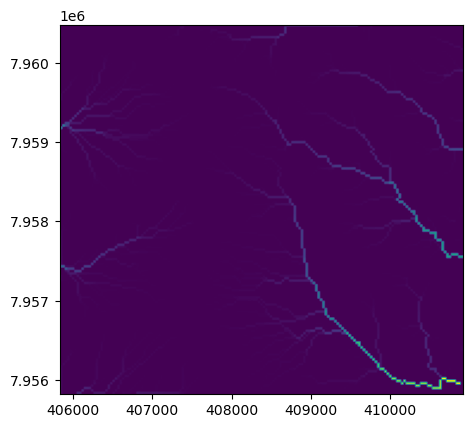

<Axes: >

In [40]:
accu = rasterio.open("accuflux.map")
show(accu)

In [41]:
stream_order = pcr.streamorder("lddsound.map")
stream_order = pcr.report(stream_order, "stream_order.map")
#stream_order = pcr.report(stream_order, "stream_order.map")

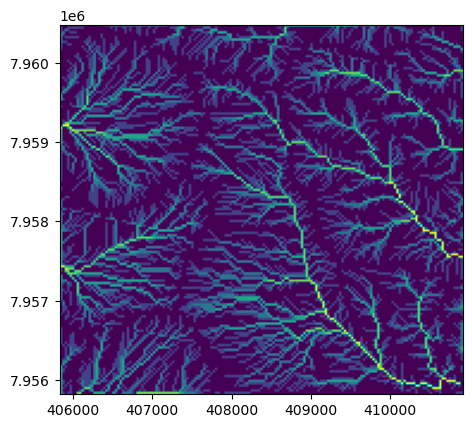

<Axes: >

In [42]:
sto2 = rasterio.open("stream_order.map")
show(sto2)

In [43]:
stream_order3 = np.where(sto2.read(1) >= 3, sto2.read(1), 1)

#defined_map = pcr.defined(stream_order)

#clone_map = pcr.setclone(stream_order, None)

#repared_map = pcr.ifthenelse(defined_map, stream_order, clone_map)

pcr_array = pcr.numpy2pcr(pcr.Scalar, stream_order3, -9999)

pcr.report(pcr_array, "stream_order3.map")



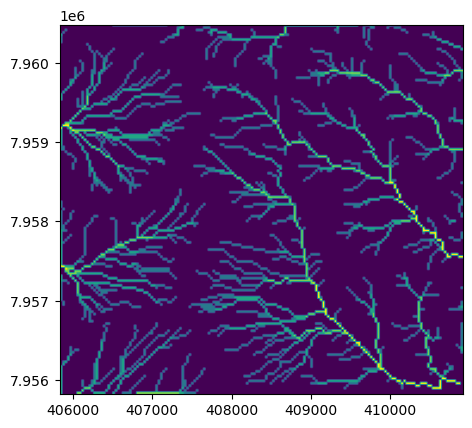

<Axes: >

In [44]:
stream_order3 = rasterio.open("stream_order3.map")

show(stream_order3)

In [45]:
###leemos el shp del punto de aforo de la cuenca o los que estèn distribuidos en ella

discharge_est= gpd.read_file(r"/home/erickcastro/shapes_modelacion_PV/location2.shp")

## iteramos cada fila que corresponde a cada punto, y se selecciona la coordenada especìfica de xy

for point in discharge_est['geometry']:
    x = point.xy[0][0]
    y = point.xy[1][0]

In [46]:
print(x)
print(y)

409360.38170747686
7956680.4706926765


In [47]:
## extraer el punto del raster segùn la coordenada del shape
row, col= stream_order3.index(x, y)

In [48]:
print(row)
print(col)

126
117


In [49]:
##extraemos el valor del pixel mediante convertir el raster de orden de drenaje en un array, ìndicando la fila y la columna que contienen la coordenada
stream_order3= stream_order3.read(1)
value_fct= 10
stream_order3[row, col] = value_fct

stream_point= np.where(stream_order3 == value_fct, stream_order3, 0)




In [50]:
stream_point

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
pcr_array_point = pcr.numpy2pcr(pcr.Scalar, stream_point, -9999)
pcr.report(pcr_array_point, "discharge.map")


In [52]:
discharge2 = pcr.boolean("discharge.map")
discharge2 = pcr.report(discharge2, "discharge2.map")

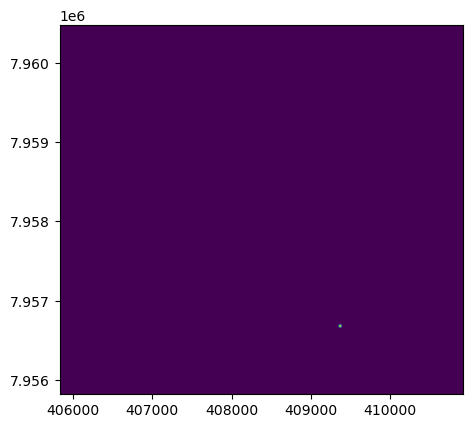

<Axes: >

In [53]:
discharge= rasterio.open('discharge2.map')
show(discharge)

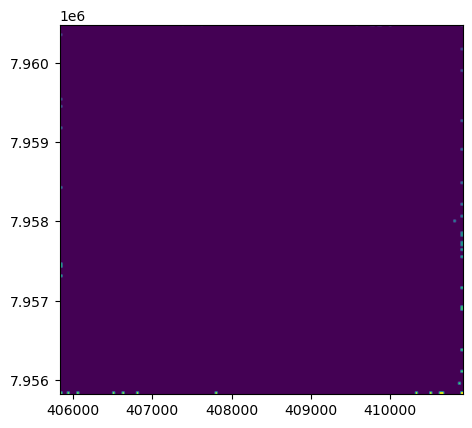

<Axes: >

In [54]:
pit= pcr.pit("lddsound.map")
pcr.report(pit, "pit.map")

pit2= rasterio.open("pit.map")
show(pit2)

In [55]:
lddsound= pcr.readmap("lddsound.map")
lddsound = pcr.ldd(lddsound)
discharge= pcr.readmap('discharge.map')
discharge = pcr.nominal(discharge)
delim= pcr.catchment(lddsound, discharge)
pcr.report(delim, "delim.map")

In [56]:
delim= pcr.catchment(lddsound, discharge)
delim = pcr.report(delim, "delim.map")

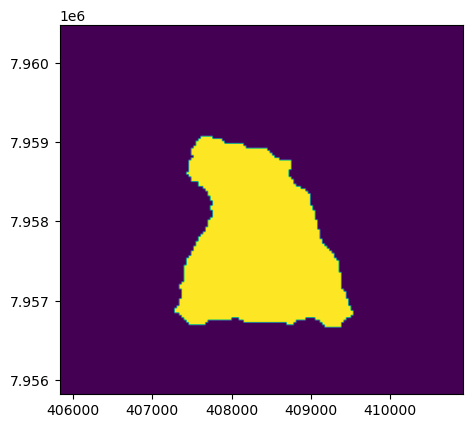

<Axes: >

In [57]:
import matplotlib.pyplot as plt

delim2 = rasterio.open("delim.map")
#fig, ax= plt.subplots(figsize= (20, 20))
#ax.set_xlim([409000, 410000])
#ax.set_ylim([7.956*1e6, 7.957*1e6])
#ax.can_zoom()
show(delim2)

In [8]:
####soil maps
sand = (r"/home/erickcastro/R_operations_PV_MODEL/Sandraster2.tif")
sandr = rasterio.open(sand)
#sand = pcr.readmap("sand.map")



In [10]:
sand = pcr.numpy2pcr(pcr.Scalar,sandr.read(1), -999)
sand = pcr.report(sand, "sand.map")


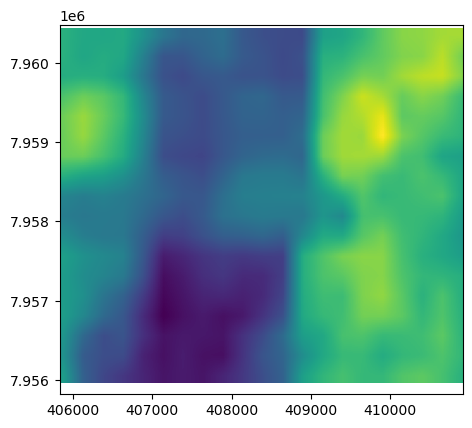

<Axes: >

In [11]:

sand2 = rasterio.open("sand.map")
show(sand2)

In [80]:
silt = (r"/home/erickcastro/shapes_modelacion_PV/siltraster2.tif")
siltr = rasterio.open(silt)
silt = pcr.numpy2pcr(pcr.Scalar, siltr.read(1), -999)
silt = pcr.report(silt, "silt.map")

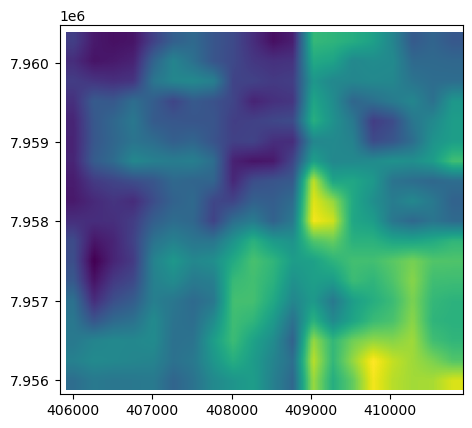

<Axes: >

In [81]:
show(siltr)

In [87]:
clay = (r"/home/erickcastro/shapes_modelacion_PV/clayraster2.tif")
clayr = rasterio.open(clay)
clay = pcr.numpy2pcr(pcr.Scalar, clayr.read(1), -999)
clay = pcr.report(clay, "clay.map")

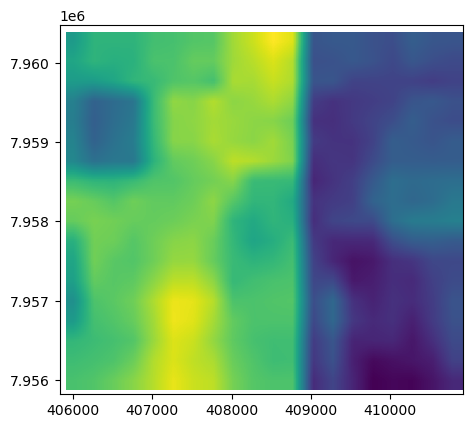

<Axes: >

In [89]:
show(clayr)